In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('COVID19ds.csv', dtype={'pos_spec_dt': str, 'pos_spec_dt':str, 'onset_dt':str})

In [3]:
dataset.shape

(8405079, 11)

In [4]:
dataset.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

In [5]:
dataset.tail(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
8405069,2020/04/14,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405070,2020/07/18,NaN,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,No,Missing,No,Missing
8405071,2020/08/14,NaN,2020/07/12,Probable Case,Missing,30 - 39 Years,Unknown,Unknown,No,No,Missing
8405072,2020/11/06,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405073,2020/11/01,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,Unknown,Unknown,No,Missing
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405078,2020/11/03,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing


In [6]:
new = dataset['Race and ethnicity (combined)'].str.split(",",n=1,expand=True)

In [7]:
dataset['Race']=new[0]
dataset['Ethnicity']=new[1]

In [8]:
dataset.drop(columns='Race and ethnicity (combined)',inplace=True)

In [9]:
dataset.shape

(8405079, 12)

In [10]:
dataset.tail(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
8405069,2020/04/14,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405070,2020/07/18,NaN,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,No,Missing,No,Missing,Unknown,None
8405071,2020/08/14,NaN,2020/07/12,Probable Case,Missing,30 - 39 Years,Unknown,No,No,Missing,Unknown,None
8405072,2020/11/06,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405073,2020/11/01,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,Unknown,No,Missing,Unknown,None
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown,None
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405078,2020/11/03,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown,None


In [11]:
#dropped the first 3 date columns

drop_list = ['cdc_report_dt', 'pos_spec_dt', 'onset_dt']
dataset = dataset.drop(drop_list,axis=1)

In [12]:
dataset.columns

Index(['current_status', 'sex', 'age_group', 'hosp_yn', 'icu_yn', 'death_yn',
       'medcond_yn', 'Race', 'Ethnicity'],
      dtype='object')

In [13]:
#looking at values in the different columns
print(dataset['sex'].unique())

['Male' 'Unknown' 'Missing' 'Female' 'Other' nan]


In [14]:
dataset = dataset[(dataset["sex"] == "Male") |
(dataset["sex"] == "Female")]
mapping_dictionary = {"sex":{ "Male": 1, "Female": 0}}
dataset = dataset.replace(mapping_dictionary)

In [15]:
dataset.tail(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
8404672,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404673,Laboratory-confirmed case,0,30 - 39 Years,Yes,Missing,No,Missing,Hispanic/Latino,None
8404674,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404675,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404676,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404677,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404678,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404679,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Missing,Missing,Hispanic/Latino,None
8404680,Laboratory-confirmed case,0,30 - 39 Years,Yes,Missing,Missing,Missing,Hispanic/Latino,None
8404681,Laboratory-confirmed case,0,30 - 39 Years,Missing,Missing,Unknown,Missing,Hispanic/Latino,None


In [16]:
#looking at values in the different columns
print(dataset['hosp_yn'].unique())

['No' 'Missing' 'Unknown' 'Yes']


In [17]:
dataset = dataset[(dataset['hosp_yn'] == "Yes") |
(dataset['hosp_yn'] == "No")]
mapping_dictionary = {'hosp_yn':{ "Yes": 1, "No": 0}}
dataset = dataset.replace(mapping_dictionary)

In [18]:
dataset.head(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
0,Laboratory-confirmed case,1,10 - 19 Years,0,Unknown,No,No,Black,Non-Hispanic
1,Laboratory-confirmed case,1,10 - 19 Years,0,No,No,No,Black,Non-Hispanic
2,Laboratory-confirmed case,1,10 - 19 Years,0,No,No,No,Black,Non-Hispanic
4,Laboratory-confirmed case,1,10 - 19 Years,0,No,No,Yes,Black,Non-Hispanic
6,Laboratory-confirmed case,1,10 - 19 Years,0,Missing,Missing,Missing,Black,Non-Hispanic
11,Laboratory-confirmed case,1,10 - 19 Years,0,No,No,No,Black,Non-Hispanic
13,Laboratory-confirmed case,1,10 - 19 Years,0,No,No,Missing,Black,Non-Hispanic
14,Laboratory-confirmed case,1,10 - 19 Years,0,No,No,Yes,Black,Non-Hispanic
16,Laboratory-confirmed case,1,10 - 19 Years,0,Missing,Missing,Yes,Black,Non-Hispanic
23,Laboratory-confirmed case,1,10 - 19 Years,0,Missing,Missing,Yes,Black,Non-Hispanic


In [19]:
dataset = dataset[(dataset['icu_yn'] == "Yes") |
(dataset['icu_yn'] == "No")]
mapping_dictionary = {'icu_yn':{ "Yes": 1, "No": 0}}
dataset = dataset.replace(mapping_dictionary)

In [20]:
#looking at values in the different columns
print(dataset['hosp_yn'].unique())

[0 1]


In [21]:
dataset.head(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
1,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,No,Black,Non-Hispanic
2,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,No,Black,Non-Hispanic
4,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,Yes,Black,Non-Hispanic
11,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,No,Black,Non-Hispanic
13,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,Missing,Black,Non-Hispanic
14,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,Yes,Black,Non-Hispanic
38,Laboratory-confirmed case,1,10 - 19 Years,0,0,Missing,No,Black,Non-Hispanic
40,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,No,Black,Non-Hispanic
41,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,Yes,Black,Non-Hispanic
42,Laboratory-confirmed case,1,10 - 19 Years,0,0,No,Yes,Black,Non-Hispanic


In [22]:
dataset = dataset[(dataset['death_yn'] == "Yes") |
(dataset['death_yn'] == "No")]
mapping_dictionary = {'death_yn':{ "Yes": 1, "No": 0}}
dataset = dataset.replace(mapping_dictionary)

In [23]:
dataset.head(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
1,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,No,Black,Non-Hispanic
2,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,No,Black,Non-Hispanic
4,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,Yes,Black,Non-Hispanic
11,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,No,Black,Non-Hispanic
13,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,Missing,Black,Non-Hispanic
14,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,Yes,Black,Non-Hispanic
40,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,No,Black,Non-Hispanic
41,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,Yes,Black,Non-Hispanic
42,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,Yes,Black,Non-Hispanic
55,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,No,Black,Non-Hispanic


In [24]:
dataset = dataset[(dataset['medcond_yn'] == "Yes") |
(dataset['medcond_yn'] == "No")]
mapping_dictionary = {'medcond_yn':{ "Yes": 1, "No": 0}}
dataset = dataset.replace(mapping_dictionary)

In [25]:
dataset.head(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
1,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
2,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
4,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic
11,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
14,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic
40,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
41,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic
42,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic
55,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
56,Laboratory-confirmed case,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic


In [26]:
#looking at values in the different columns
print(dataset['current_status'].unique())

['Laboratory-confirmed case' 'Probable Case']


In [27]:
dataset = dataset[(dataset['current_status'] == "Laboratory-confirmed case")]
mapping_dictionary = {'current_status':{ "Laboratory-confirmed case": 1}}
dataset = dataset.replace(mapping_dictionary)

In [28]:
#Now we should only have the cases for confirmed
print(dataset['current_status'].unique())

[1]


In [29]:
#drop_list = ['current_status']
#dataset = dataset.drop(drop_list,axis=1)

In [30]:
dataset

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
1,1,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
2,1,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
4,1,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic
11,1,1,10 - 19 Years,0,0,0,0,Black,Non-Hispanic
14,1,1,10 - 19 Years,0,0,0,1,Black,Non-Hispanic
...,...,...,...,...,...,...,...,...,...
8404279,1,0,30 - 39 Years,0,0,0,1,Hispanic/Latino,None
8404296,1,0,30 - 39 Years,0,0,0,0,Hispanic/Latino,None
8404365,1,0,30 - 39 Years,0,0,0,1,Hispanic/Latino,None
8404392,1,0,30 - 39 Years,0,0,0,1,Hispanic/Latino,None


In [31]:
#looking at values in the different columns
print(dataset['age_group'].unique())

['10 - 19 Years' '20 - 29 Years' '30 - 39 Years' '40 - 49 Years'
 '50 - 59 Years' '0 - 9 Years' '60 - 69 Years' '80+ Years' '70 - 79 Years'
 'Unknown']


In [32]:
dataset = dataset[(dataset["age_group"] == "10 - 19 Years") |
    (dataset["age_group"] == "20 - 29 Years") | (dataset["age_group"] == "30 - 39 Years") | (dataset["age_group"] == "40 - 49 Years") | 
    (dataset["age_group"] == "50 - 59 Years") | (dataset["age_group"] == "60 - 69 Years") | (dataset["age_group"] == "70 - 79 Years") | 
    (dataset["age_group"] == "80+ Years") | (dataset["age_group"] == "0 - 9 Years") ]
mapping_dictionary = {"age_group":{"10 - 19 Years":1, "20 - 29 Years" :2, "30 - 39 Years":3,
                             "40 - 49 Years":4,"50 - 59 Years":5, "0 - 9 Years":0, "60 - 69 Years":6,
                             "80+ Years":8, "70 - 79 Years":7}}
dataset = dataset.replace(mapping_dictionary)

In [33]:
dataset.tail(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
8403906,1,0,3,0,0,0,0,Hispanic/Latino,None
8403956,1,0,3,1,0,0,1,Hispanic/Latino,None
8403982,1,0,3,0,0,0,1,Hispanic/Latino,None
8404026,1,0,3,0,0,0,1,Hispanic/Latino,None
8404210,1,0,3,0,0,0,1,Hispanic/Latino,None
8404279,1,0,3,0,0,0,1,Hispanic/Latino,None
8404296,1,0,3,0,0,0,0,Hispanic/Latino,None
8404365,1,0,3,0,0,0,1,Hispanic/Latino,None
8404392,1,0,3,0,0,0,1,Hispanic/Latino,None
8404559,1,0,3,0,0,0,1,Hispanic/Latino,None


In [34]:
#looking at values in the different columns
print(dataset['Race'].unique())

['Black' 'White' 'Missing' 'Hispanic/Latino' 'Unknown' 'Asian'
 'Multiple/Other' 'American Indian/Alaska Native'
 'Native Hawaiian/Other Pacific Islander']


In [35]:
dataset = dataset[(dataset["Race"] == "Black") |
    (dataset["Race"] == "White") | (dataset["Race"] == "Hispanic/Latino") | (dataset["Race"] == "Asian") | 
    (dataset["Race"] == "Multiple/Other") | (dataset["Race"] == "American Indian/Alaska Native") | (dataset["Race"] == "Native Hawaiian/Other Pacific Islander")]
mapping_dictionary = {"Race":{"Black":1, "White" :2, "Hispanic/Latino":3,
                             "Asian":4,"Multiple/Other":5, "American Indian/Alaska Native":6,
                             "Native Hawaiian/Other Pacific Islander":7}}
dataset = dataset.replace(mapping_dictionary)


In [36]:
dataset.tail(10)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
8403906,1,0,3,0,0,0,0,3,None
8403956,1,0,3,1,0,0,1,3,None
8403982,1,0,3,0,0,0,1,3,None
8404026,1,0,3,0,0,0,1,3,None
8404210,1,0,3,0,0,0,1,3,None
8404279,1,0,3,0,0,0,1,3,None
8404296,1,0,3,0,0,0,0,3,None
8404365,1,0,3,0,0,0,1,3,None
8404392,1,0,3,0,0,0,1,3,None
8404559,1,0,3,0,0,0,1,3,None


In [37]:
#looking at values in the different columns
print(dataset['Ethnicity'].unique())

[' Non-Hispanic' None]


In [38]:
dataset.shape

(436557, 9)

In [39]:
X =  dataset[['medcond_yn','age_group']]
y = dataset['hosp_yn']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
#Training the Naive Bayes Classification model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred = classifier.predict(X_test) 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88    106099
           1       0.49      0.55      0.52     24869

    accuracy                           0.81    130968
   macro avg       0.69      0.71      0.70    130968
weighted avg       0.82      0.81      0.81    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

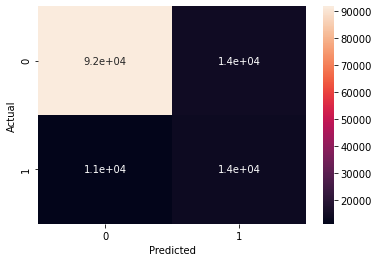

In [43]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [45]:
print(scores)

[0.8112287  0.87101429 0.89456203 0.93583929 0.58727323 0.7240471
 0.81862745 0.89087161 0.70136296 0.82176154]


In [46]:
print(scores.mean())

0.8056588189392198


In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90    106099
           1       0.57      0.36      0.44     24869

    accuracy                           0.83    130968
   macro avg       0.71      0.65      0.67    130968
weighted avg       0.81      0.83      0.81    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

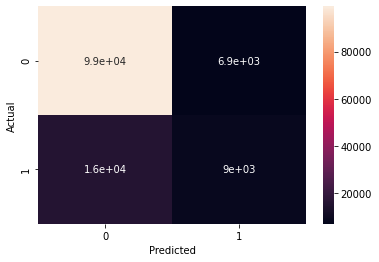

In [49]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [51]:
print(scores)

[0.8112287  0.8112287  0.81223658 0.88342954 0.68210555 0.77604453
 0.81862745 0.81172832 0.86031382 0.81122437]


In [52]:
print(scores.mean())

0.8078167566119699


In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87    106099
           1       0.45      0.38      0.41     24869

    accuracy                           0.79    130968
   macro avg       0.65      0.63      0.64    130968
weighted avg       0.78      0.79      0.79    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

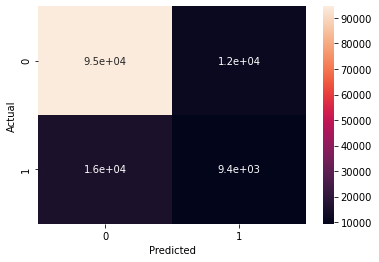

In [55]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [56]:
#cross validation for KNN
from sklearn.model_selection import cross_val_score

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [58]:
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [59]:
print(scores)

[0.8112287  0.32943925 0.72143577 0.89715045 0.67117922 0.71552593
 0.78829943 0.82707594 0.81280495 0.78243042]


In [60]:
print(scores.mean())

0.735657005477608


In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90    106099
           1       0.57      0.36      0.44     24869

    accuracy                           0.83    130968
   macro avg       0.71      0.65      0.67    130968
weighted avg       0.81      0.83      0.81    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

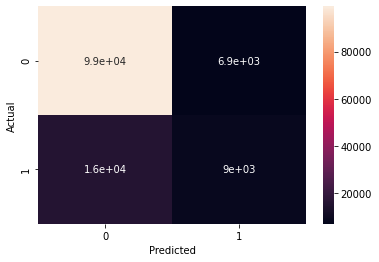

In [63]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [64]:
scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

In [65]:
print(scores)

[0.81121724 0.84784451 0.71801949 0.78510153 0.81121508]


In [66]:
print(scores.mean())

0.7946795728791205


In [141]:
X =  dataset[['medcond_yn','age_group','hosp_yn']]
y = dataset['death_yn']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [143]:
#Training the Naive Bayes Classification model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [144]:
y_pred = classifier.predict(X_test) 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95    122312
           1       0.39      0.78      0.52      8656

    accuracy                           0.91    130968
   macro avg       0.69      0.85      0.73    130968
weighted avg       0.94      0.91      0.92    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

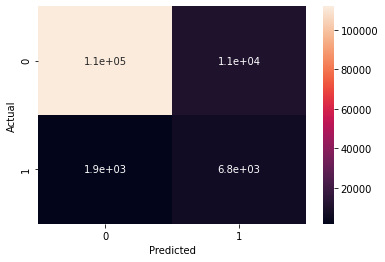

In [145]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [146]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [147]:
print(scores)

[0.96355598 0.99122686 0.98856973 0.9178578  0.75716969 0.76747755
 0.8717702  0.96110411 0.88773336 0.95931737]


In [148]:
print(scores.mean())

0.9065782668014719


In [149]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [150]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    122312
           1       0.58      0.29      0.39      8656

    accuracy                           0.94    130968
   macro avg       0.76      0.64      0.68    130968
weighted avg       0.93      0.94      0.93    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

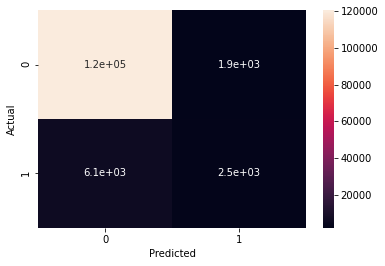

In [151]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [152]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [153]:
print(scores)

[0.93398387 0.93483141 0.94094741 0.98027763 0.80169965 0.86620396
 0.9888446  0.98726377 0.93805979 0.93398236]


In [154]:
print(scores.mean())

0.9306094449924901


In [155]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [156]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    122312
           1       0.43      0.48      0.46      8656

    accuracy                           0.92    130968
   macro avg       0.70      0.72      0.71    130968
weighted avg       0.93      0.92      0.93    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

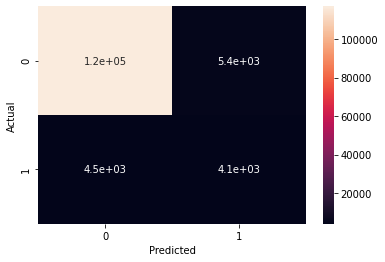

In [157]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [158]:
#cross validation for KNN
from sklearn.model_selection import cross_val_score

In [160]:
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [161]:
print(scores)

[0.9340755  0.96096756 0.93249496 0.98421752 0.83525747 0.93398387
 0.83605919 0.93521933 0.93398236 0.92953843]


In [162]:
print(scores.mean())

0.9215796196172837


In [163]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [164]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    122312
           1       0.58      0.29      0.39      8656

    accuracy                           0.94    130968
   macro avg       0.76      0.64      0.68    130968
weighted avg       0.93      0.94      0.93    130968



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

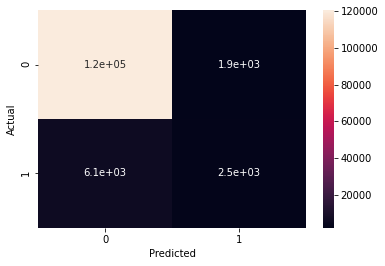

In [165]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [168]:
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [169]:
print(scores)

[0.93398387 0.93483141 0.94094741 0.98027763 0.85704141 0.88249038
 0.8479934  0.93398236 0.93805979 0.93398236]


In [170]:
print(scores.mean())

0.9183590022551549
